In [1]:
import pandas as pd
import numpy as np
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2oXTSzIphUOOQW4YpPPr7My--VQ0tPu2kmlNcFCQkJ2x',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'kidneydisease-donotdelete-pr-emf34qhywhjedb'
object_key = 'chronickidneydisease.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [2]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
df.drop(columns='id',axis=1)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
df.shape

(400, 26)

In [5]:
df.dtypes


id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
for col in df:
    unique=df[col].value_counts()
    print(unique,"\n========================= \n")

0      1
263    1
273    1
272    1
271    1
      ..
130    1
129    1
128    1
127    1
399    1
Name: id, Length: 400, dtype: int64 

60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64 

80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: bp, dtype: int64 

1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64 

0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: al, dtype: int64 

0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: su, dtype: int64 

normal      201
abnormal     47
Name: rbc, dtype: int64 

normal      259
abnormal     76
Name: pc, dtype: int64 

notpresent    354
present        42
Name: pcc, dtype: int64 

notpresent    374
present        22
Name: ba, dtype: int64 

99.0     10
93.0      9
100.0     9
107

In [8]:
df.drop('id',axis=1,inplace=True)

In [9]:
df['pcv']=df['pcv'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t43','43').replace('\t?','Nan'))
df['wc']=df['wc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan').replace('\t6200','6200').replace('\t8400','8400'))
df['rc']=df['rc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan'))
df['dm']=df['dm'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no').replace('\tyes','yes').replace(' yes','yes'))
df['cad']=df['cad'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no'))
df['classification']=df['classification'].apply(lambda x:x if type(x)==type(3.5) else x.replace('ckd\t','ckd'))

In [10]:
object_columns=[['pcv','rc','wc']]
for i in object_columns:
    df[i]=df[i].astype('float')

In [11]:
categorical_columns=list(df.select_dtypes('object'))
categorical_columns

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [12]:
numerical_columns=list(df.select_dtypes(['int64','float64']))
numerical_columns

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [13]:
df.isnull().sum().sort_values(ascending=True)

classification      0
pe                  1
appet               1
ane                 1
cad                 2
dm                  2
htn                 2
pcc                 4
ba                  4
age                 9
bp                 12
sc                 17
bu                 19
bgr                44
al                 46
sg                 47
su                 49
hemo               52
pc                 65
pcv                71
sod                87
pot                88
wc                106
rc                131
rbc               152
dtype: int64

In [14]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [15]:
for col in numerical_columns:
    df[col]=df[col].fillna(df[col].median())

In [16]:
df['rbc'].fillna('normal',inplace=True)
df['pc'].fillna('normal',inplace=True)
df['pcc'].fillna('notpresent',inplace=True)
df['ba'].fillna('notpresent',inplace=True)
df['htn'].fillna('no',inplace=True)
df['dm'].fillna('no',inplace=True)
df['cad'].fillna('no',inplace=True)
df['appet'].fillna('good',inplace=True)
df['pe'].fillna('no',inplace=True)
df['ane'].fillna('no',inplace=True)

In [17]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [18]:
classification= {'ckd': 1, 'notckd': 0}
df['classification'] = df['classification'].map(classification)

In [19]:
df['rbc']=df['rbc'].map({'normal':0,'abnormal':1})
df['pc']=df['pc'].map({'normal':0,'abnormal':1})
df['pcc']=df['pcc'].map({'notpresent':0,'present':1})
df['ba']=df['ba'].map({'notpresent':0,'present':1})
df['htn']=df['htn'].map({'no':0,'yes':1})
df['dm']=df['dm'].map({'no':0,'yes':1})
df['cad']=df['cad'].map({'no':0,'yes':1})
df['pe']=df['pe'].map({'no':0,'yes':1})
df['ane']=df['ane'].map({'no':0,'yes':1})
df['appet']=df['appet'].map({'good':0,'poor':1})

In [20]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

In [21]:
df.columns=['age','bloodpressure','specificgravity','albumin','sugar','redbloodcells','puscell','puscellclumps','bacteria','bloodglucoserandom','bloodurea','serumcreatinine','sodium','potassium','haemoglobin','packedcellvolume','whitebloodcellcount','redbloodcellcount','hypertension','diabetesmellitus','coronaryarterydisease','appetite','pedaledema','anemia','classification']
df

,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,bloodglucoserandom,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,0


(array([  7.,   0.,  84.,   0.,   0.,  75.,   0., 153.,   0.,  81.]),
 array([1.005, 1.007, 1.009, 1.011, 1.013, 1.015, 1.017, 1.019, 1.021,
        1.023, 1.025]),
 <BarContainer object of 10 artists>)

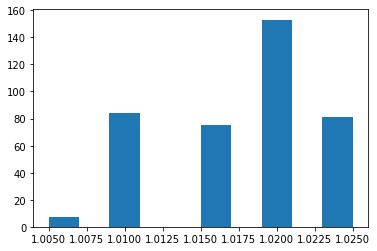

In [22]:
plt.hist(df['specificgravity'])

<AxesSubplot:xlabel='age', ylabel='bloodpressure'>

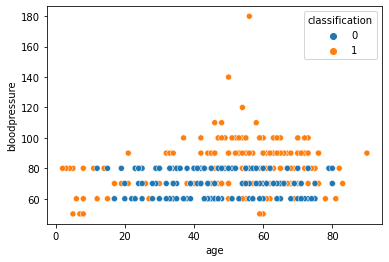

In [23]:
import seaborn as sns
sns.scatterplot(x=df["age"],y=df['bloodpressure'],hue=df["classification"])


In [24]:
import seaborn as sns

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

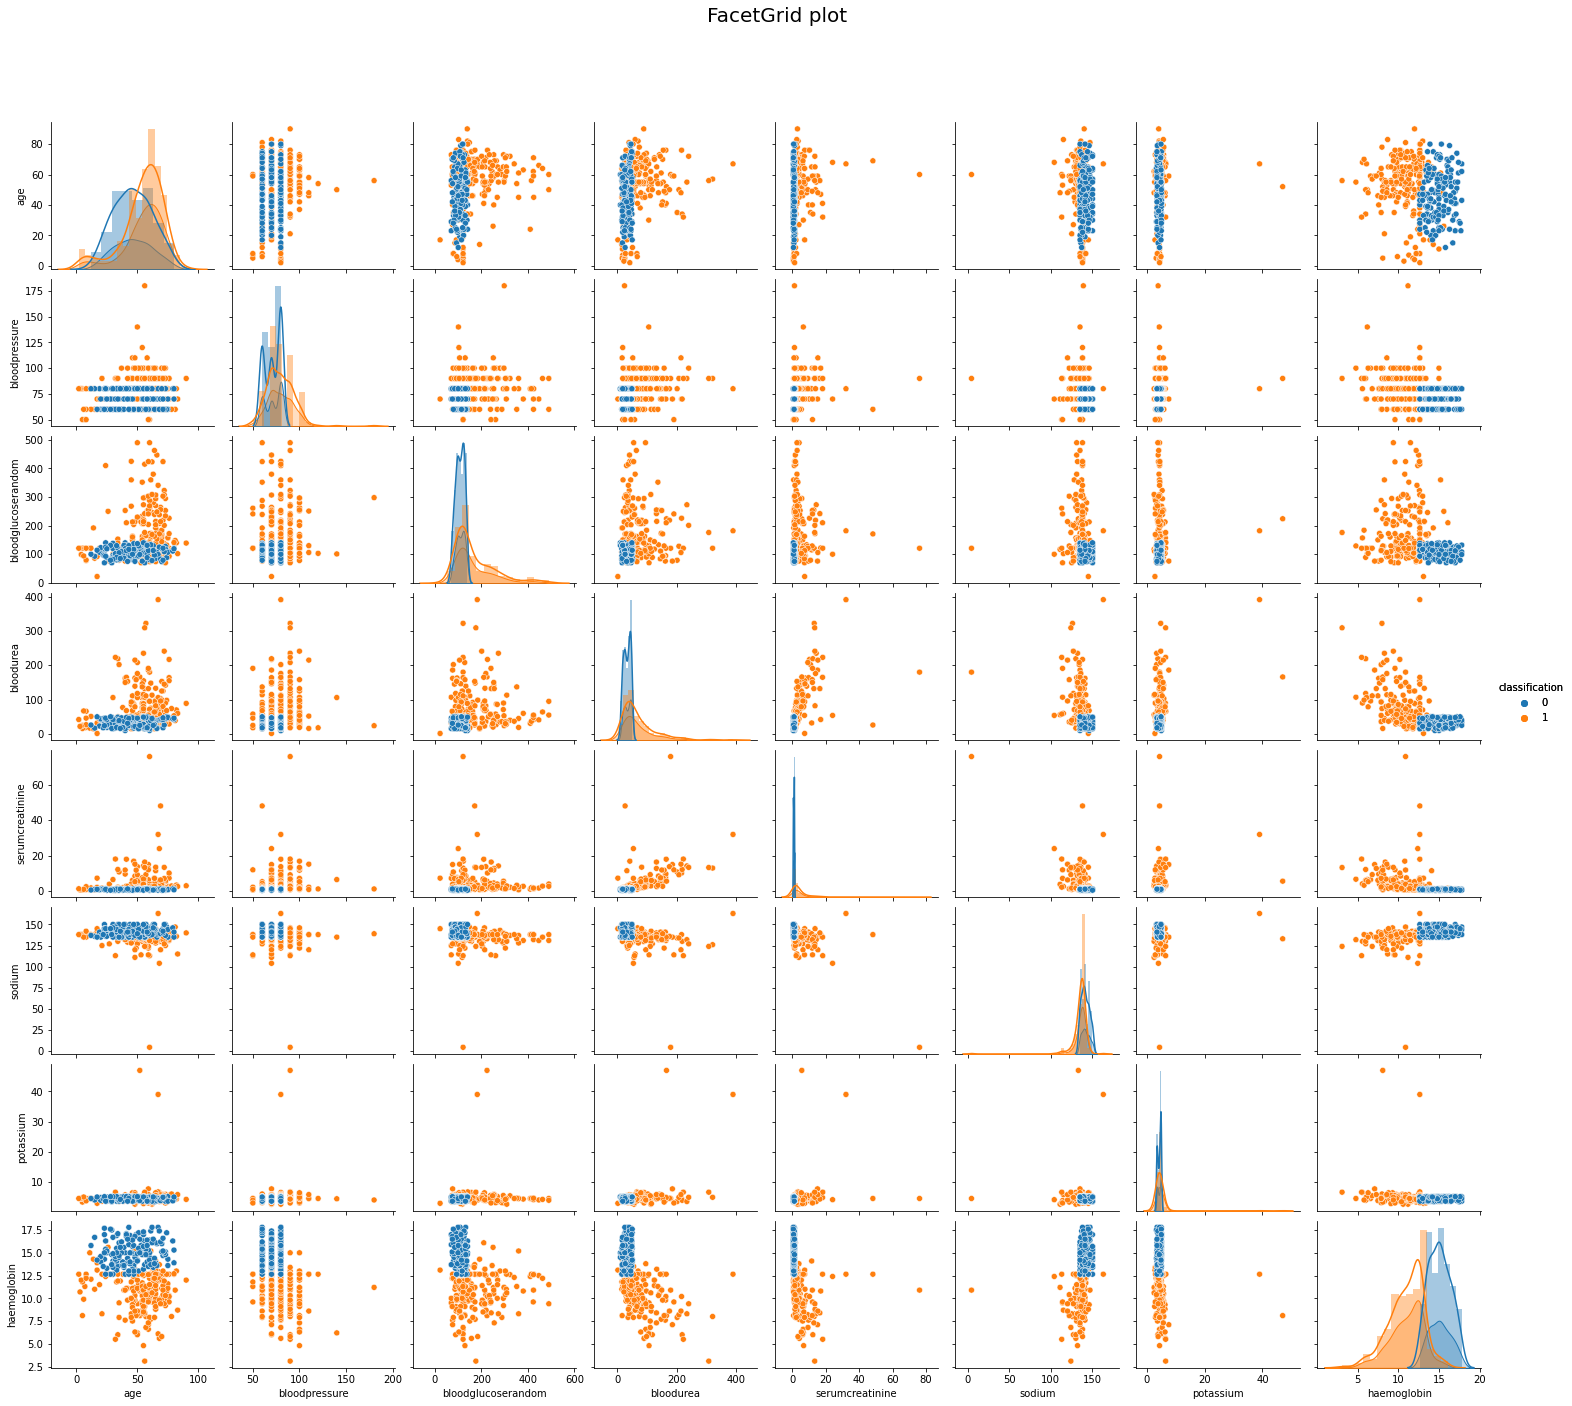

In [25]:
g = sns.pairplot(df, vars =['age', 'bloodpressure','bloodglucoserandom', 'bloodurea', 'serumcreatinine','sodium', 'potassium', 'haemoglobin'],hue = 'classification')
g.map_diag(sns.distplot)
g.add_legend()
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

In [26]:
df[df['classification'] == 1].describe()

,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,bloodglucoserandom,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
count,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.0
mean,54.55600,79.640000,1.014940,1.440000,0.632000,0.188000,0.304000,0.168000,0.088000,167.148000,...,34.83200,8646.000000,4.369200,0.588000,0.548000,0.136000,0.328000,0.304000,0.24000,1.0
std,17.10747,14.925195,0.004795,1.407952,1.258137,0.391496,0.460905,0.374616,0.283863,86.996504,...,6.91397,2828.016036,0.747829,0.493182,0.498689,0.343476,0.470427,0.460905,0.42794,0.0
min,2.00000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.00000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.0
25%,48.00000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.250000,...,30.00000,7900.000000,3.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.0
50%,59.00000,80.000000,1.015000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127.500000,...,36.00000,8000.000000,4.800000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.0
75%,65.00000,90.000000,1.020000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,210.000000,...,40.00000,9575.000000,4.800000,1.000000,1.000000,0.000000,1.000000,1.000000,0.00000,1.0
max,90.00000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,52.00000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0


In [27]:
df[df['classification'] == 0].describe()

,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,bloodglucoserandom,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
count,150.000000,150.000000,150.000000,150.0,150.0,150.0,150.0,150.0,150.0,150.000000,...,150.000000,150.000000,150.000000,150.0,150.0,150.0,150.0,150.0,150.0,150.0
mean,46.573333,71.466667,1.022333,0.0,0.0,0.0,0.0,0.0,0.0,108.253333,...,46.166667,7719.333333,5.352000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,15.593987,8.544135,0.002503,0.0,0.0,0.0,0.0,0.0,0.0,18.373524,...,4.205169,1797.115387,0.594688,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,12.000000,60.000000,1.020000,0.0,0.0,0.0,0.0,0.0,0.0,70.000000,...,40.000000,4300.000000,4.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,34.000000,60.000000,1.020000,0.0,0.0,0.0,0.0,0.0,0.0,94.250000,...,43.000000,6325.000000,4.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,46.000000,70.000000,1.020000,0.0,0.0,0.0,0.0,0.0,0.0,109.000000,...,45.500000,7750.000000,5.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,58.000000,80.000000,1.025000,0.0,0.0,0.0,0.0,0.0,0.0,122.750000,...,50.000000,9200.000000,5.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,80.000000,80.000000,1.025000,0.0,0.0,0.0,0.0,0.0,0.0,140.000000,...,54.000000,11000.000000,6.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
corr = df.corr()
corr.style.background_gradient(cmap='RdBu_r')

,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,bloodglucoserandom,bloodurea,serumcreatinine,sodium,potassium,haemoglobin,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
age,1.000000,0.136316,-0.160374,0.085918,0.186750,0.014904,0.102286,0.157401,0.042427,0.230731,0.194291,0.133985,-0.086040,0.049399,-0.178308,-0.212796,0.093794,-0.203199,0.395073,0.364306,0.231419,0.156581,0.094772,0.052938,0.227842
bloodpressure,0.136316,1.000000,-0.166980,0.123518,0.189561,0.150384,0.156231,0.056808,0.110164,0.150180,0.180841,0.143184,-0.100705,0.063667,-0.279303,-0.289237,0.022177,-0.219317,0.266901,0.226489,0.084135,0.175054,0.056902,0.195134,0.293693
specificgravity,-0.160374,-0.166980,1.000000,-0.479962,-0.292053,-0.253894,-0.365353,-0.306426,-0.231704,-0.299413,-0.244995,-0.171998,0.210791,-0.052935,0.490699,0.496434,-0.195068,0.432222,-0.323643,-0.351016,-0.135814,-0.230975,-0.253803,-0.184155,-0.659504
albumin,0.085918,0.123518,-0.479962,1.000000,0.287751,0.394844,0.561713,0.417868,0.377935,0.293150,0.347418,0.161310,-0.225612,0.107893,-0.474399,-0.473446,0.202920,-0.405092,0.406057,0.308101,0.200957,0.303145,0.411080,0.229556,0.531562
sugar,0.186750,0.189561,-0.292053,0.287751,1.000000,0.092940,0.190062,0.168091,0.119399,0.627002,0.126897,0.096434,-0.051758,0.177396,-0.156807,-0.181285,0.156649,-0.161994,0.254268,0.430514,0.229301,0.069216,0.116442,0.042464,0.294555
redbloodcells,0.014904,0.150384,-0.253894,0.394844,0.092940,1.000000,0.377394,0.102948,0.184402,0.138615,0.233935,0.135660,-0.139037,-0.020473,-0.280996,-0.279875,-0.003471,-0.196534,0.140538,0.145646,0.111493,0.160868,0.199285,0.107625,0.282642
puscell,0.102286,0.156231,-0.365353,0.561713,0.190062,0.377394,1.000000,0.520118,0.330401,0.247665,0.344501,0.158038,-0.171171,0.155434,-0.411707,-0.418435,0.106733,-0.381949,0.291719,0.201032,0.172295,0.274985,0.350227,0.260566,0.375154
puscellclumps,0.157401,0.056808,-0.306426,0.417868,0.168091,0.102948,0.520118,1.000000,0.275082,0.195223,0.189094,0.054429,-0.138816,-0.011416,-0.276645,-0.296580,0.163215,-0.263810,0.195623,0.165236,0.188029,0.189688,0.104356,0.175861,0.265313
bacteria,0.042427,0.110164,-0.231704,0.377935,0.119399,0.184402,0.330401,0.275082,1.000000,0.079162,0.161676,0.053959,-0.082156,-0.001944,-0.204860,-0.189420,0.104748,-0.192212,0.089046,0.080070,0.162395,0.149126,0.134732,0.052208,0.186871
bloodglucoserandom,0.230731,0.150180,-0.299413,0.293150,0.627002,0.138615,0.247665,0.195223,0.079162,1.000000,0.118859,0.068886,-0.130569,0.052732,-0.254435,-0.258200,0.119881,-0.214094,0.367816,0.503254,0.207020,0.177285,0.094806,0.112449,0.379321


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Age')

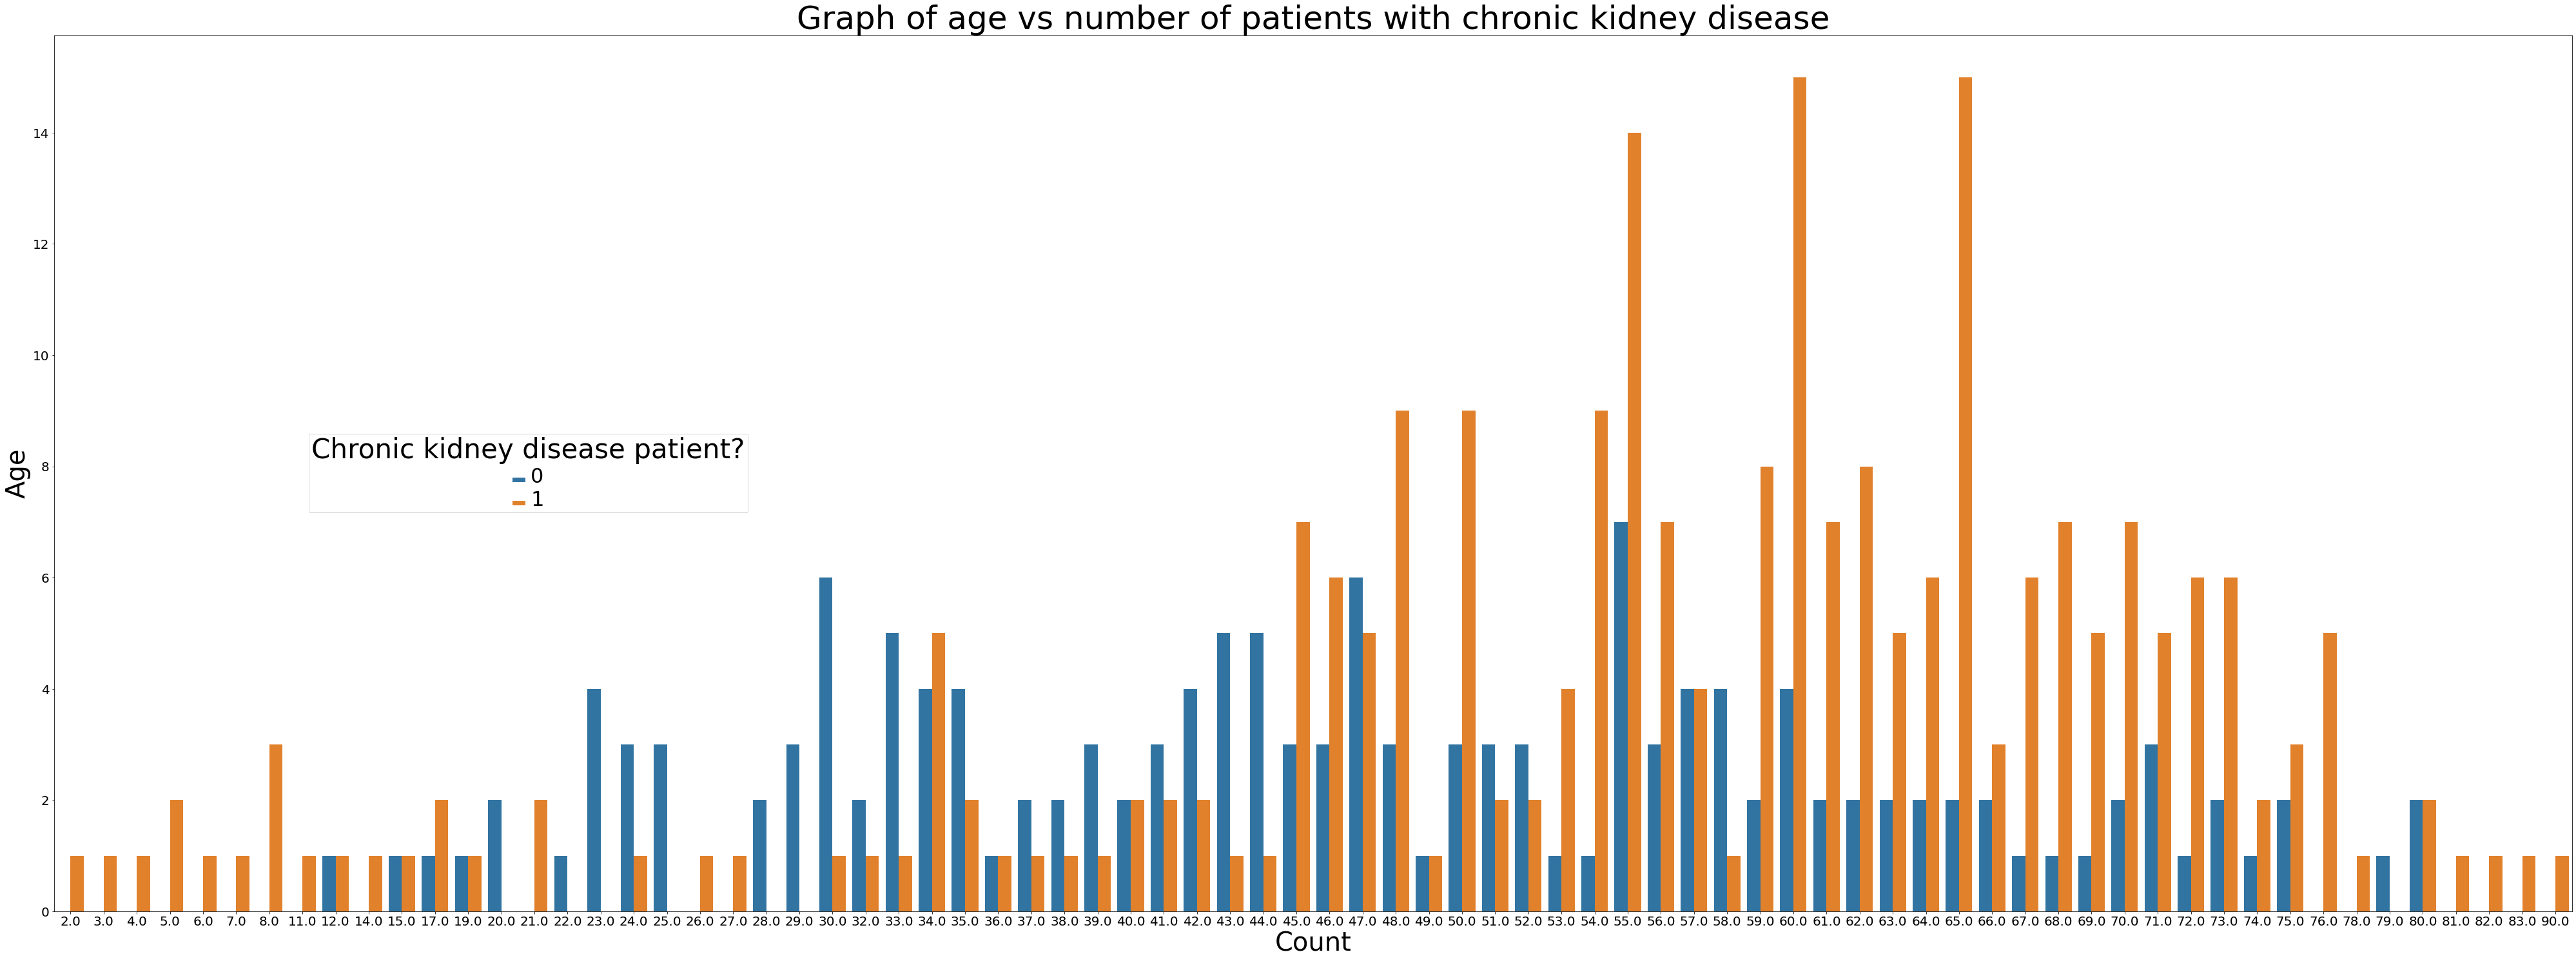

In [29]:
plt.figure(figsize=(70,25))
plt.legend(loc='upper left')
g = sns.countplot(data = df, x = 'age', hue = 'classification')
g.legend(title = 'Chronic kidney disease patient?', loc='center left', bbox_to_anchor=(0.1, 0.5), ncol=1)
g.tick_params(labelsize=20)
plt.setp(g.get_legend().get_texts(), fontsize='32')
plt.setp(g.get_legend().get_title(), fontsize='42')
g.axes.set_title('Graph of age vs number of patients with chronic kidney disease',fontsize=50)
g.set_xlabel('Count',fontsize=40)
g.set_ylabel("Age",fontsize=40)

In [30]:
age_correlation = ['age', 'classification']
age_correlation1 = df[age_correlation]
age_corr_y = age_correlation1[age_correlation1['classification'] == 1].groupby(['age']).size().reset_index(name = 'count')
age_corr_y.corr()

,age,count
age,1.000000,0.381292
count,0.381292,1.000000


Text(0.5, 1.0, 'Correlation graph for Age vs chronic kidney disease patient')

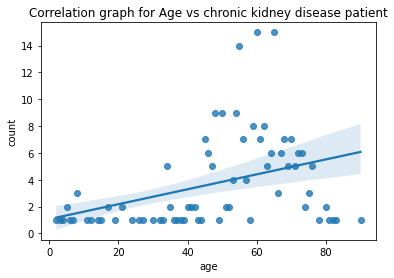

In [31]:
sns.regplot(data = age_corr_y, x = 'age', y = 'count').set_title("Correlation graph for Age vs chronic kidney disease patient")

In [32]:
age_corr_n = age_correlation1[age_correlation1['classification'] == 0].groupby(['age']).size().reset_index(name = 'count')
age_corr_n.corr()

,age,count
age,1.000000,-0.130137
count,-0.130137,1.000000


Text(0.5, 1.0, 'Correlation graph for Age vs healthy patient')

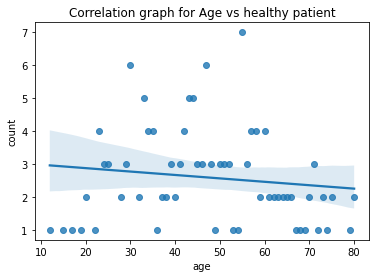

In [33]:
sns.regplot(data = age_corr_n, x = 'age', y = 'count').set_title("Correlation graph for Age vs healthy patient")


In [34]:
import scipy
cont = pd.crosstab(df["redbloodcells"],df["classification"])
scipy.stats.chi2_contingency(cont)

(30.16735981355353,
 3.9632369208759623e-08,
 1,
 array([[132.375, 220.625],
        [ 17.625,  29.375]]))

In [35]:
cont = pd.crosstab(df["puscell"],df["classification"])
scipy.stats.chi2_contingency(cont)

(54.33831492311025,
 1.6877864730866308e-13,
 1,
 array([[121.5, 202.5],
        [ 28.5,  47.5]]))

In [36]:
bgr_corr = ['bloodglucoserandom', 'classification']
bgr_corr1 = df[bgr_corr]
bgr_corr1.bgr = bgr_corr1.bloodglucoserandom.round(-1)
bgr_correlation_y = bgr_corr1[bgr_corr1['classification'] == 1].groupby(['bloodglucoserandom']).size().reset_index(name = 'count')
bgr_correlation_y.corr()

/tmp/wsuser/ipykernel_273/1515194120.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  bgr_corr1.bgr = bgr_corr1.bloodglucoserandom.round(-1)


,bloodglucoserandom,count
bloodglucoserandom,1.00000,-0.14278
count,-0.14278,1.00000


Text(0.5, 1.0, 'Correlation graph for blood glucose vs chronic kidney disease patient')

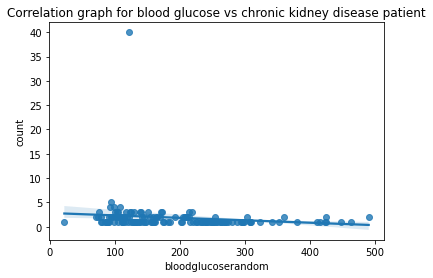

In [37]:
sns.regplot(data = bgr_correlation_y, x = 'bloodglucoserandom', y = 'count').set_title("Correlation graph for blood glucose vs chronic kidney disease patient")


In [38]:
bgr_corr_n = bgr_corr1[bgr_corr1['classification'] == 0].groupby(['bloodglucoserandom']).size().reset_index(name = 'count')
bgr_corr_n.corr()

,bloodglucoserandom,count
bloodglucoserandom,1.000000,0.177066
count,0.177066,1.000000


Text(0.5, 1.0, 'Correlation graph for blood glucose vs healthy patient')

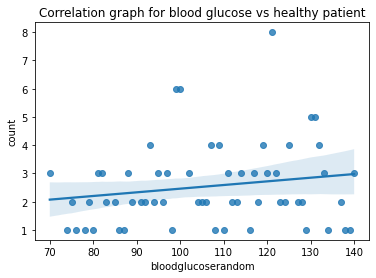

In [39]:
sns.regplot(data = bgr_corr_n, x = 'bloodglucoserandom', y = 'count').set_title("Correlation graph for blood glucose vs healthy patient")


In [40]:
burea_corr = ['bloodurea', 'classification']
burea_corr1 = df[burea_corr]
burea_corr1.bu = df.bloodurea.round(-1)
burea_corr_y = burea_corr1[burea_corr1['classification'] == 1].groupby(['bloodurea']).size().reset_index(name = 'count')
burea_corr_y.corr()

/tmp/wsuser/ipykernel_273/3862755159.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  burea_corr1.bu = df.bloodurea.round(-1)


,bloodurea,count
bloodurea,1.000000,-0.435393
count,-0.435393,1.000000


Text(0.5, 1.0, 'Correlation graph for blood urea vs CKD patient')

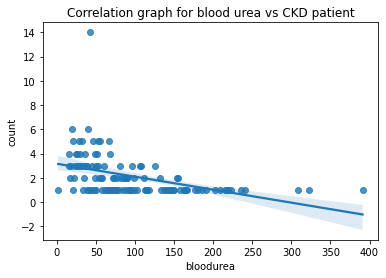

In [41]:
sns.regplot(data = burea_corr_y, x = 'bloodurea', y = 'count').set_title('Correlation graph for blood urea vs CKD patient')


In [42]:
bu_corr_n = burea_corr1[burea_corr1['classification'] == 0].groupby(['bloodurea']).size().reset_index(name = 'count')
bu_corr_n.corr()

,bloodurea,count
bloodurea,1.000000,0.239879
count,0.239879,1.000000


Text(0.5, 1.0, 'Correlation graph for blood urea vs healthy patient')

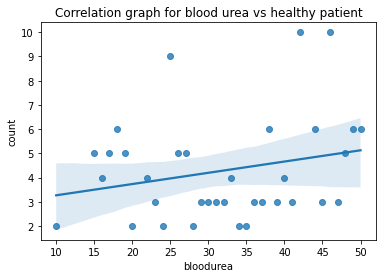

In [43]:
sns.regplot(data = bu_corr_n, x = 'bloodurea', y = 'count').set_title('Correlation graph for blood urea vs healthy patient')


In [44]:
sodium_corr = ['sodium', 'classification']
sodium_corr1 = df[sodium_corr]
sodium_corr_y = sodium_corr1[sodium_corr1['classification'] == 1].groupby(['sodium']).size().reset_index(name = 'count')
sodium_corr_y.corr()

,sodium,count
sodium,1.000000,0.149289
count,0.149289,1.000000


Text(0.5, 1.0, 'Correlation graph for blood sodium vs CKD patient')

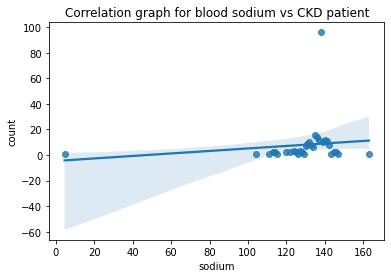

In [45]:
sns.regplot(data = sodium_corr_y, x = 'sodium', y = 'count').set_title('Correlation graph for blood sodium vs CKD patient')


In [46]:
sodium_corr_n = sodium_corr1[sodium_corr1['classification'] == 0].groupby(['sodium']).size().reset_index(name = 'count')
sodium_corr_n.corr()

,sodium,count
sodium,1.000000,-0.017577
count,-0.017577,1.000000


Text(0.5, 1.0, 'Correlation graph for blood sodium vs healthy patient')

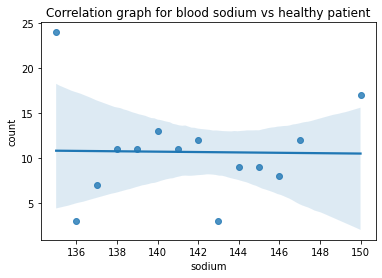

In [47]:
sns.regplot(data = sodium_corr_n, x = 'sodium', y = 'count').set_title('Correlation graph for blood sodium vs healthy patient')


In [48]:
cont = pd.crosstab(df["pedaledema"],df["classification"])
scipy.stats.chi2_contingency(cont)

(54.33831492311025,
 1.6877864730866308e-13,
 1,
 array([[121.5, 202.5],
        [ 28.5,  47.5]]))

In [49]:
cont = pd.crosstab(df["anemia"],df["classification"])
scipy.stats.chi2_contingency(cont)

(40.491503267973854,
 1.9747291794838495e-10,
 1,
 array([[127.5, 212.5],
        [ 22.5,  37.5]]))

In [50]:
serumc_corr = ['serumcreatinine', 'classification']
serumc_corr1 = df[serumc_corr]
serumc_corr1.sc = serumc_corr1.serumcreatinine.round(1)
serumc_corr_y = serumc_corr1[serumc_corr1['classification'] == 1].groupby(['serumcreatinine']).size().reset_index(name = 'count')
serumc_corr_y.corr()

/tmp/wsuser/ipykernel_273/1092372620.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  serumc_corr1.sc = serumc_corr1.serumcreatinine.round(1)


,serumcreatinine,count
serumcreatinine,1.000000,-0.376633
count,-0.376633,1.000000


Text(0.5, 1.0, 'Correlation graph for serum creatinine vs CKD patient')

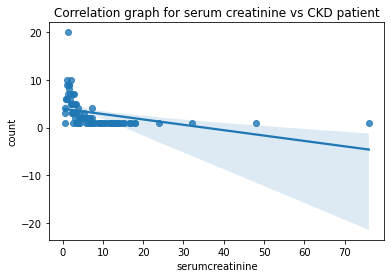

In [51]:
sns.regplot(data = serumc_corr_y, x = 'serumcreatinine', y = 'count').set_title('Correlation graph for serum creatinine vs CKD patient')


In [52]:
serumc_corr_n = serumc_corr1[serumc_corr1['classification'] == 0].groupby(['serumcreatinine']).size().reset_index(name = 'count')
serumc_corr_n.corr()

,serumcreatinine,count
serumcreatinine,1.000000,0.223618
count,0.223618,1.000000


Text(0.5, 1.0, 'Correlation graph for serum creatinine vs CKD patient')

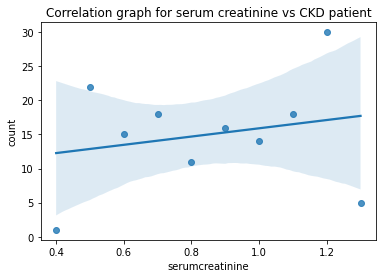

In [53]:
sns.regplot(data = serumc_corr_n, x = 'serumcreatinine', y = 'count').set_title('Correlation graph for serum creatinine vs CKD patient')


In [54]:
cont = pd.crosstab(df["diabetesmellitus"],df["classification"])
scipy.stats.chi2_contingency(cont)

(122.59739298566973,
 1.7082083994569608e-28,
 1,
 array([[ 98.625, 164.375],
        [ 51.375,  85.625]]))

In [55]:
cont = pd.crosstab(df["coronaryarterydisease"],df["classification"])
scipy.stats.chi2_contingency(cont)

(20.580735026250938,
 5.716852372774115e-06,
 1,
 array([[137.25, 228.75],
        [ 12.75,  21.25]]))

In [56]:
X = df.drop(['classification'], axis = 1)
y = df['classification']
X.head()

,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,bloodglucoserandom,...,haemoglobin,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,121.0,...,11.3,38.0,6000.0,4.8,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,...,9.6,31.0,7500.0,4.8,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=33)


In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [59]:
from sklearn.model_selection import ShuffleSplit,GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
def find_best_model(x,y):
    models={'Logistic_regression':{'model':LogisticRegression(solver='liblinear',penalty='l2',multi_class='auto'),'parameter':{'C':[1,4,8]}},
           'decision_tree':{'model':DecisionTreeClassifier(splitter='best'),'parameter':{'criterion':['gini','entropy'],'max_depth':[5,7,13,15]}},
           'svm':{'model':SVC(gamma='auto'),'parameter':{'kernel':['sigmoid','linear'],'C':[1,5,10,15]}},
           'random_forest':{'model':RandomForestClassifier(criterion='gini'),'parameter':{'max_depth':[5,10,15],'n_estimators':[1,3,5]}}}
    scores=[]
    cv_shuffle=StratifiedKFold(n_splits=10)
    
    for model_name,model_params in models.items():
        gs=GridSearchCV(model_params['model'],model_params['parameter'],cv=cv_shuffle,return_train_score=False)
        gs.fit(x,y)
        scores.append({'model':model_name,'best_parameters':gs.best_params_,'score':gs.best_score_})
    return pd.DataFrame(scores,columns=['model','best_parameters','score'])
find_best_model(X_train,y_train)

KeyboardInterrupt: 

In [60]:
rf=RandomForestClassifier(max_depth=10,n_estimators=5)

In [61]:
X_train=X_train[['age','haemoglobin','redbloodcells','specificgravity','albumin','serumcreatinine','hypertension','sodium','bloodpressure','whitebloodcellcount']]
X_test=X_test[['age','haemoglobin','redbloodcells','specificgravity','albumin','serumcreatinine','hypertension','sodium','bloodpressure','whitebloodcellcount']]
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, n_estimators=5)

In [62]:
!pip install ibm_watson_machine_learning

In [63]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"QhoFbRSt_fE2DqkxtoBpww_NplmFAOS11vcwayKLx38h"
}
client=APIClient(wml_credentials)

In [64]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])


In [65]:
space_uid=guid_from_space_name(client,'models')
print("Space UID= "+space_uid)

Space UID= 44dae678-3cb8-402e-b109-511512150419


In [66]:
client.set.default_space(space_uid)

'SUCCESS'

In [67]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [68]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [69]:
model_details=client.repository.store_model(model=rf,meta_props={
 client.repository.ModelMetaNames.NAME:"CKD",
 client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
 client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                            
)
model_id=client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [70]:
model_id

'c7aa3333-a315-4408-a664-544e54997ac3'

In [71]:
y_pred=rf.predict(X_test)

In [72]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [73]:
print(accuracy_score(y_pred,y_test))

0.9666666666666667


In [74]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[54,  4],
       [ 0, 62]])

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        58
           1       0.94      1.00      0.97        62

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [76]:
prediction = rf.predict([[65,4.0,0,1.025,0,0.5,0,100,30,2000]])[0]
print(prediction)

1


In [77]:
import pickle
pickle.dump(rf,open("EDCKDML.pkl","wb"))

In [79]:
model_id = client.repository.get_model_id(model_details)
model_id

'c7aa3333-a315-4408-a664-544e54997ac3'

In [81]:
deployment_props = {
    client.deployments.ConfigurationMetaNames.NAME:'kidney_disease', 
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [ ]:
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)